In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plt_img(img_set,img_title):
    ch = len(img_set)
    plt.figure(figsize=(20,20))
    for i in range(ch):
        plt.subplot(2,3,i+1)
        ln = len(img_set[i].shape)
        if ln == 3:
            plt.imshow(img_set[i])
        else:
            plt.imshow(img_set[i],cmap='gray')
        plt.title(img_title[i])
    plt.show()

(800, 800, 3)
(800, 800)


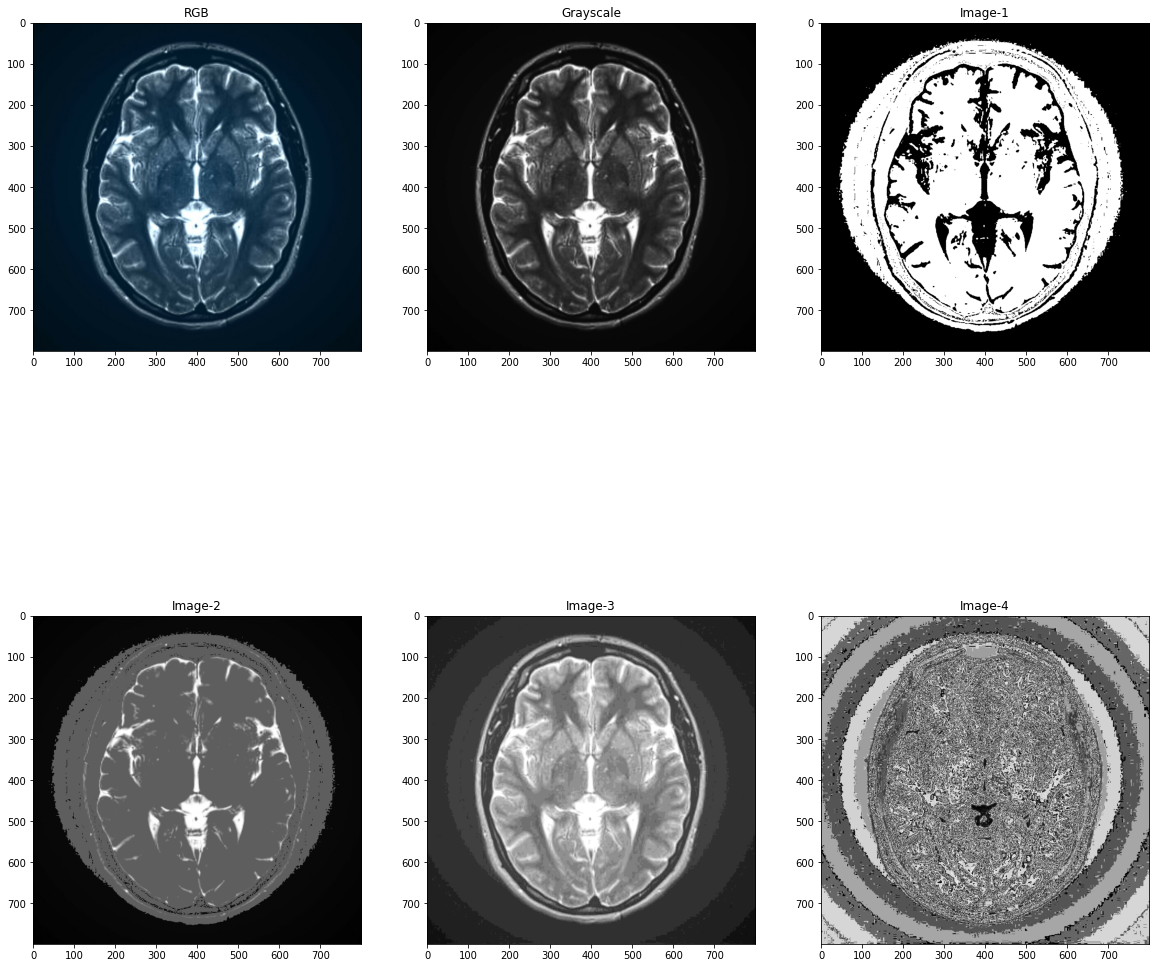

In [3]:
def main():

    rgbImg = plt.imread('mri1.jpg')
    print(rgbImg.shape)
    
    grayscale = cv2.cvtColor(rgbImg,cv2.COLOR_RGB2GRAY)
    print(grayscale.shape)
    x,y = grayscale.shape
    
    """Constants"""
    T1=20
    T2= 100
    c=5
    p=2
    epsilon = 0.0000001
    
    image1 = np.zeros((x,y), dtype = np.uint8)
    image2 = np.zeros((x,y), dtype = np.uint8)
    image3 = np.zeros((x,y), dtype = np.uint8)
    image4 = np.zeros((x,y), dtype = np.uint8)
    
    for i in range(x):
        for j in range(y):
            image3[i,j] = c * np.log(1+grayscale[i,j])
            image4[i,j] = c * pow((grayscale[i,j]+epsilon),p)

            if (grayscale[i,j] >= T1 and grayscale[i,j] <=T2):
                image1[i,j] = 100
                image2[i,j] = 100
            else:
                image1[i,j] = 10
                image2[i,j] = grayscale[i,j]
                 
    
    img_set = [rgbImg,grayscale,image1,image2,image3,image4]
    img_title = ['RGB','Grayscale','Image-1','Image-2','Image-3','Image-4']
    
    plt_img(img_set,img_title)
    
    
if __name__ == '__main__':
    main()
            